# **Alzheimer's Disease Early Detection Project**
### Predicting Risk Using Social Determinants of Health
This notebook demonstrates a full data science pipeline for predicting individuals at high risk of Alzheimer's Disease using social determinants of health.

## **1. Problem Definition**
The goal is to build a model to predict individuals at high risk of Alzheimer's Disease or related dementias. This will aid in early detection and prevention efforts, potentially improving patient outcomes.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## **2. Data Understanding**
### Load and Inspect the Data

In [2]:
# Load datasets
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
test_features = pd.read_csv('test_features.csv')

# Preview datasets
print('Train Features:\n', train_features.head())
print('Train Labels:\n', train_labels.head())
print('Test Features:\n', test_features.head())

Train Features:
     uid    age_03     urban_03  married_03  n_mar_03    edu_gru_03  \
0  aace       NaN          NaN         NaN       NaN           NaN   
1  aanz       NaN          NaN         NaN       NaN           NaN   
2  aape       NaN          NaN         NaN       NaN           NaN   
3  aard  1. 50–59  1. 100,000+  3. Widowed       1.0  3. 7–9 years   
4  ablr       NaN          NaN         NaN       NaN           NaN   

  n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  ...  \
0               NaN           NaN          NaN           NaN  ...   
1               NaN           NaN          NaN           NaN  ...   
2               NaN           NaN          NaN           NaN  ...   
3         1. 1 or 2           0.0      4. Fair           0.0  ...   
4               NaN           NaN          NaN           NaN  ...   

            rrelgimp_12            rrfcntx_m_12              rsocact_m_12  \
0  2.somewhat important                 9.Never                   9.Ne

### Data Summary and Structure

In [3]:
# Check dataset shapes and data types
print(f'Train Features Shape: {train_features.shape}')
print(f'Train Labels Shape: {train_labels.shape}')
print(f'Test Features Shape: {test_features.shape}')

print('Data Types:\n', train_features.dtypes)
print('Unique Values:\n', train_features.nunique())

Train Features Shape: (3276, 184)
Train Labels Shape: (4343, 3)
Test Features Shape: (819, 184)
Data Types:
 uid            object
age_03         object
urban_03       object
married_03     object
n_mar_03      float64
               ...   
a21_12        float64
a22_12         object
a33b_12        object
a34_12         object
j11_12         object
Length: 184, dtype: object
Unique Values:
 uid           3276
age_03           5
urban_03         2
married_03       4
n_mar_03         6
              ... 
a21_12          15
a22_12           7
a33b_12          3
a34_12           2
j11_12           3
Length: 184, dtype: int64


## **3. Data Preparation**
### Handle Missing Values

In [4]:
# Fill missing values for numerical columns
numeric_cols = train_features.select_dtypes(include=['float64', 'int64']).columns
train_features[numeric_cols] = train_features[numeric_cols].fillna(train_features[numeric_cols].median())

# Fill missing values for categorical columns
categorical_cols = train_features.select_dtypes(include=['object']).columns
train_features[categorical_cols] = train_features[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))


### Handle Outliers

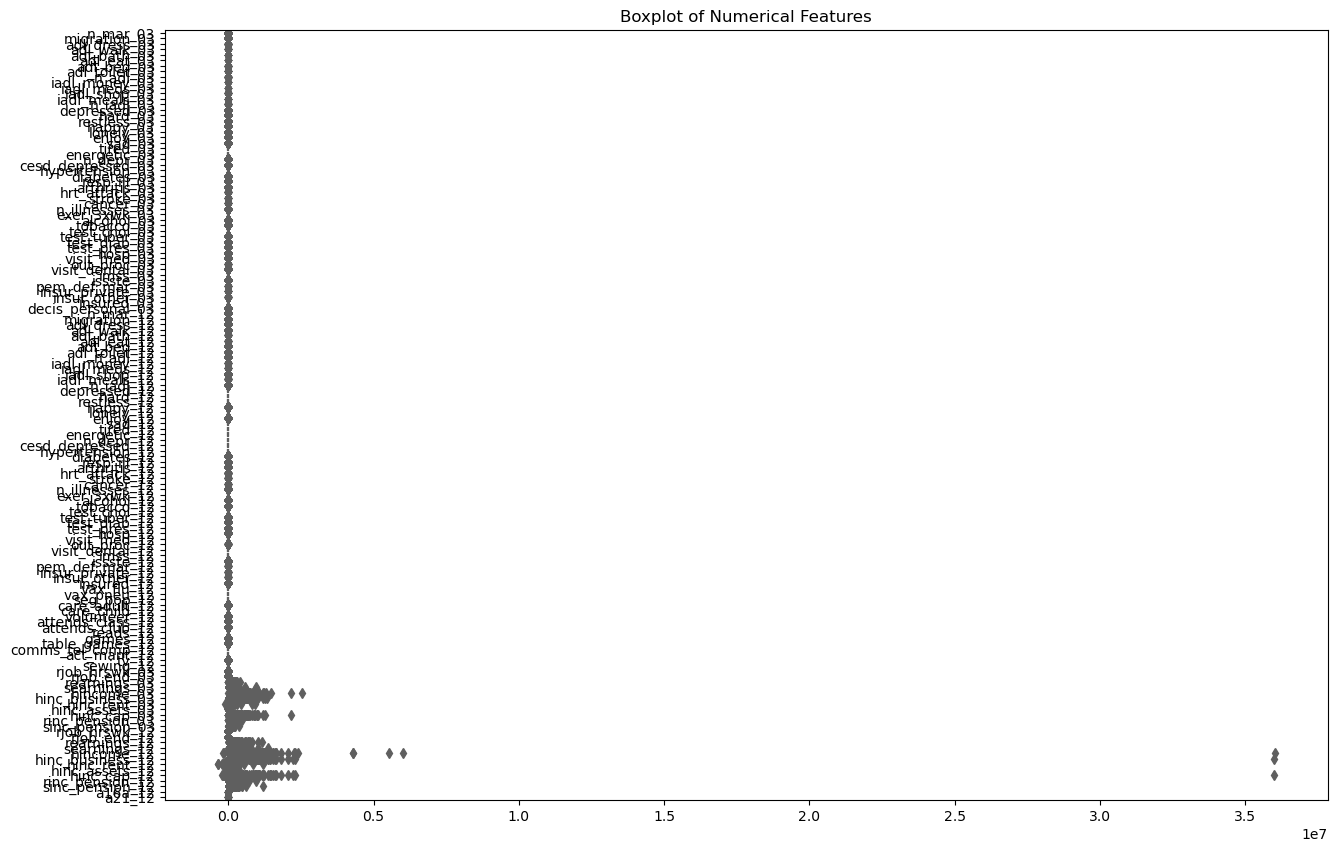

In [5]:
# Identify outliers using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_features[numeric_cols], orient='h', palette='Set3')
plt.title('Boxplot of Numerical Features')
plt.show()

# Handle outliers using IQR
for col in numeric_cols:
    q1 = train_features[col].quantile(0.25)
    q3 = train_features[col].quantile(0.75)
    iqr = q3 - q1
    train_features[col] = np.where(train_features[col] > (q3 + 1.5 * iqr), q3 + 1.5 * iqr, train_features[col])
    train_features[col] = np.where(train_features[col] < (q1 - 1.5 * iqr), q1 - 1.5 * iqr, train_features[col])

### Feature Scaling and Encoding

In [6]:
# One-hot encode categorical features
train_features = pd.get_dummies(train_features, drop_first=True)
test_features = pd.get_dummies(test_features, drop_first=True)

# Align columns between train and test sets
test_features = test_features.reindex(columns=train_features.columns, fill_value=0)

# Standardize numerical features
scaler = StandardScaler()
train_features[numeric_cols] = scaler.fit_transform(train_features[numeric_cols])
test_features[numeric_cols] = scaler.transform(test_features[numeric_cols])

## **4. Exploratory Data Analysis (EDA)**
### Correlation Heatmap

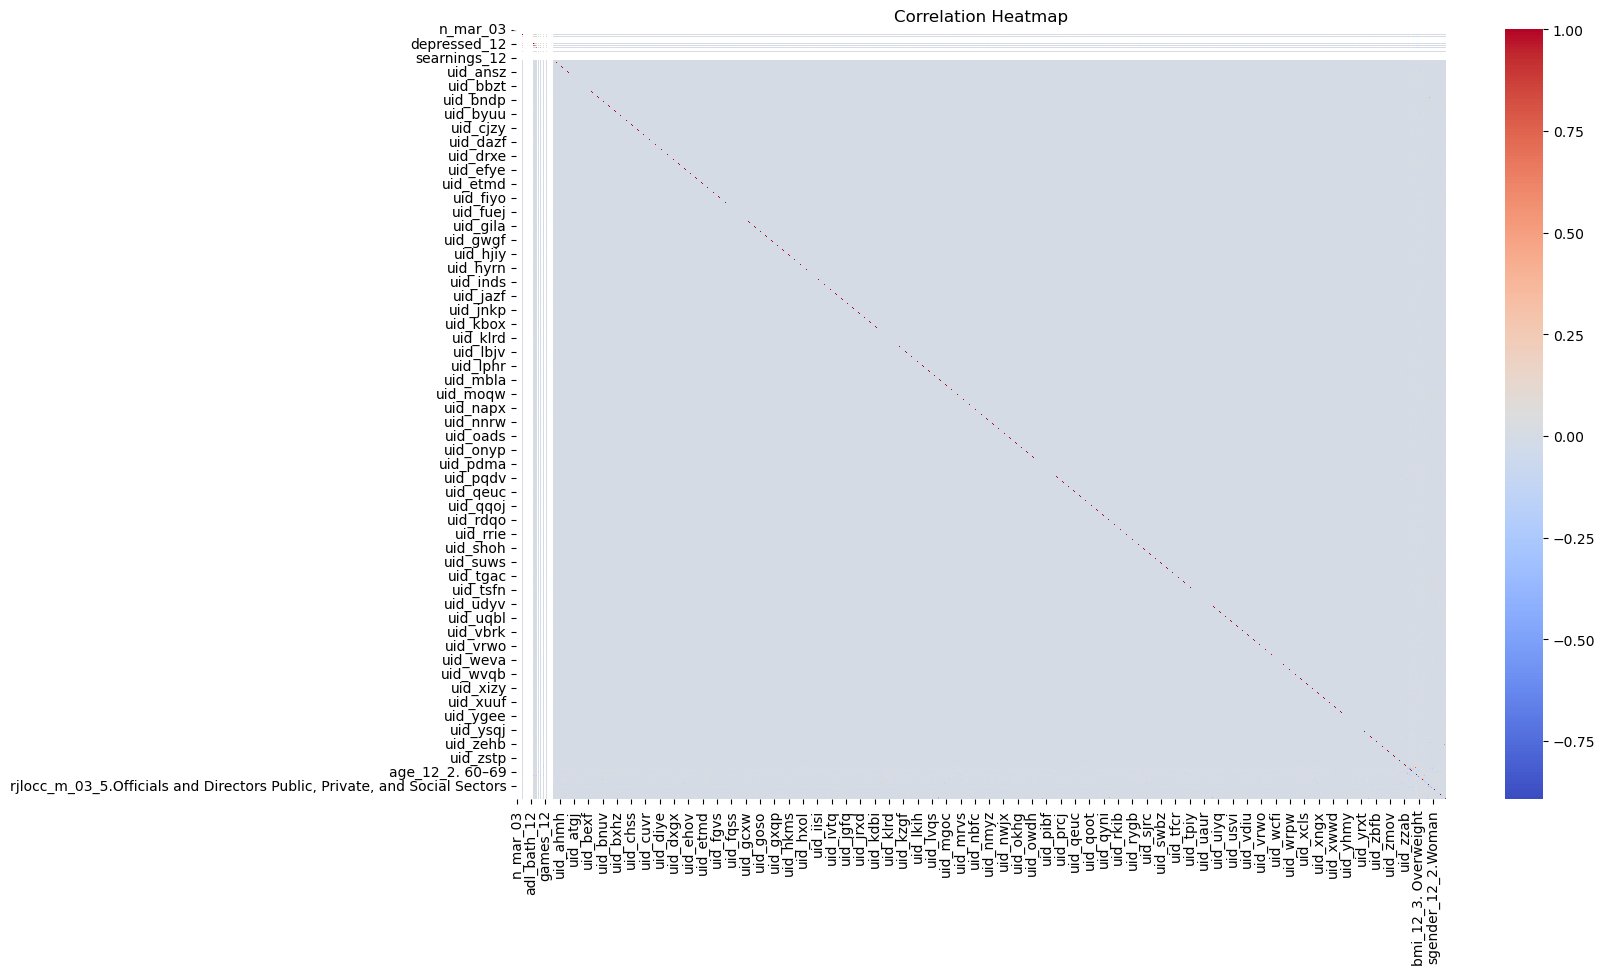

In [7]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(train_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

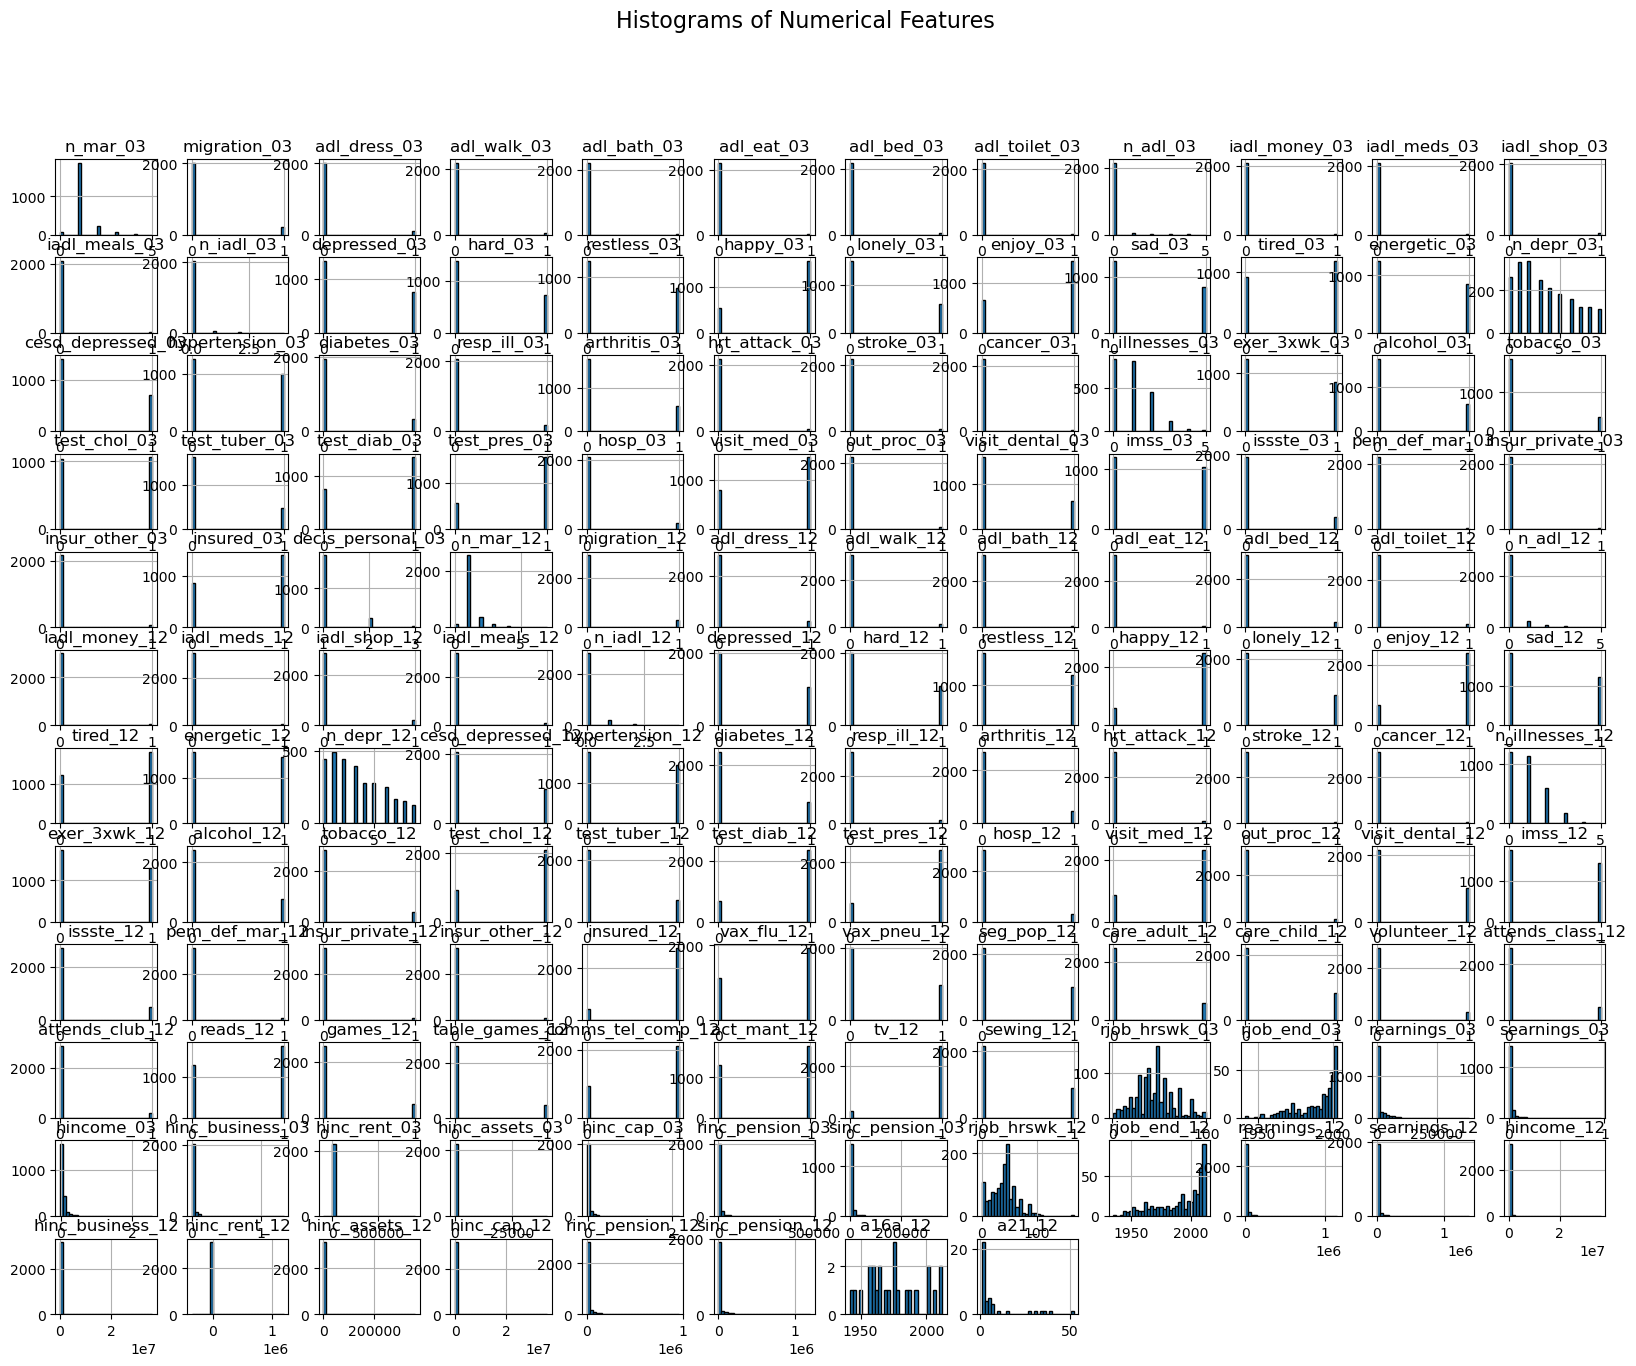

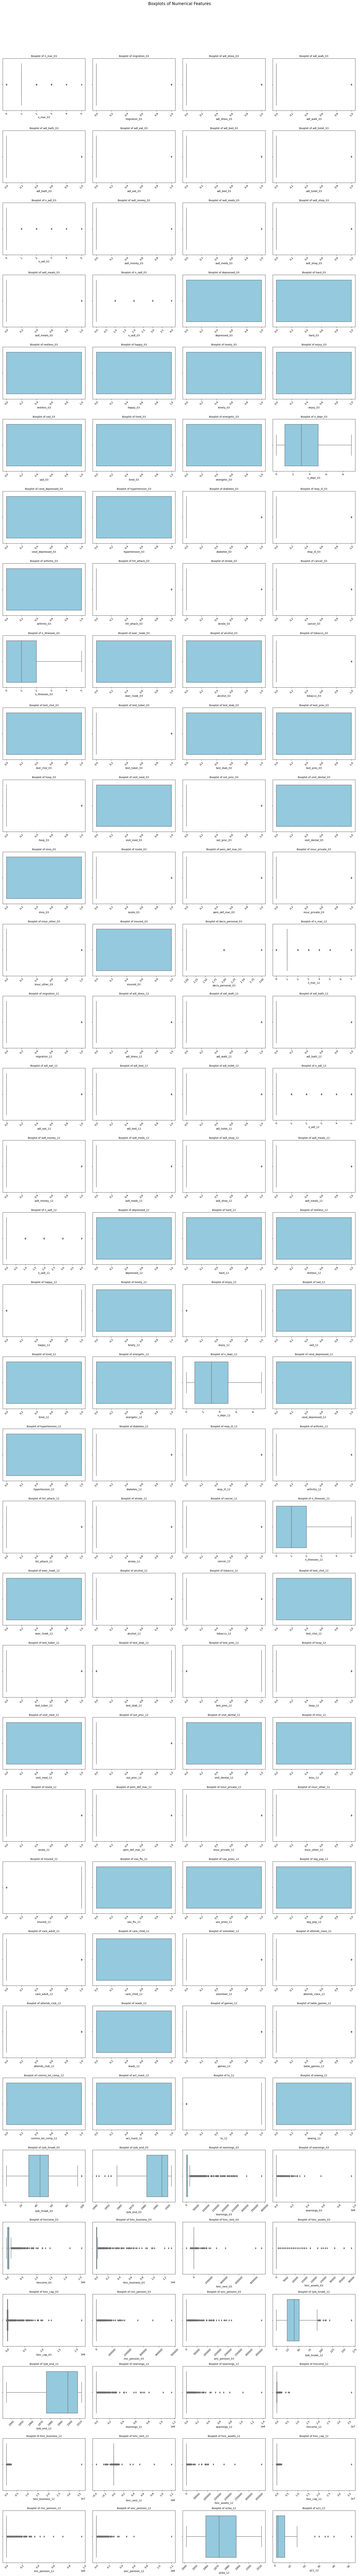

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (update the file path as needed)
train_features = pd.read_csv("train_features.csv")

# Improved Histograms with more bins and larger plot size
train_features.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# Improved Boxplots with multiple plots in a grid
numeric_columns = train_features.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numeric_columns)

# Define number of rows and columns for subplots
n_cols = 4
n_rows = (num_plots // n_cols) + (num_plots % n_cols > 0)

plt.figure(figsize=(20, n_rows * 4))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=train_features, x=col, color='skyblue')
    plt.title(f"Boxplot of {col}", fontsize=10)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features", y=1.02, fontsize=16)
plt.show()

### Feature Distributions

In [ ]:
# Histograms for feature distributions
train_features.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

## **5. Model Selection and Tuning**
### Split the Data

In [ ]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_features, train_labels.squeeze(), test_size=0.2, random_state=42
)

### Baseline Model: Logistic Regression

In [ ]:
# Logistic Regression as baseline
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)

# Evaluation
print('Logistic Regression Report:\n', classification_report(y_val, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, y_pred))

### Advanced Model: Random Forest with Hyperparameter Tuning

In [ ]:
# Random Forest with Grid Search
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_val)

# Evaluation
print('Random Forest Report:\n', classification_report(y_val, y_pred_rf))
print('ROC-AUC Score:', roc_auc_score(y_val, best_rf.predict_proba(X_val)[:, 1]))

## **6. Deployment**
### Save the Model

In [ ]:
# Save the best model
import joblib
joblib.dump(best_rf, 'alzheimer_risk_model.pkl')

## **7. Recommendations**
- **Public Health**: Target high-risk areas with awareness campaigns.
- **Policy Changes**: Improve access to preventative healthcare.
- **Future Research**: Investigate deeper interactions between features for improved predictions.